# Домашнее задание №7

## Задание 1

Скачать первую [тестовую видео-последовательность](https://drive.google.com/file/d/123SPuc_uxbWYRp653JBGxj4qV2HYEoKS/view?usp=sharing). (Для считывания видео-последовательностей: cv.VideoCapture)

In [1]:
import cv2
import numpy as np
import skimage
import skimage.io
from matplotlib import pyplot as plt

cap = cv2.VideoCapture('bg_sub1/in%06d.jpg')

## Задание 2

Построить модель фона на 1000 изображениях и выполнить сегментацию движения на 1001ом изображении методами (на вход алгоритмов нужно подавать изображение в градациях серого):
* Mean Filter
* Mean Filter with refreshing background c параметром 𝛼=0.1
* GMM

In [2]:
def mean_filter(gray_frame, threshold_value, vid, frame_index, num_of_frames):
    if num_of_frames > frame_index:
        print("Can't calculate background - there are not enough frames!")
        return None
    
    vid.set(cv2.CAP_PROP_POS_FRAMES, frame_index - num_of_frames - 1)
    bg = np.zeros(cv2.cvtColor(vid.read()[1], cv2.COLOR_RGB2GRAY).shape)
    
    for i in range(num_of_frames - 1):
        _, frame = vid.read()
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
        bg += gray_frame
    bg /= num_of_frames
    
    diff = abs(gray_frame.astype(np.int16) - bg.astype(np.int16))
    return cv2.threshold(diff, threshold_value, np.iinfo(np.uint8).max, cv2.THRESH_BINARY)[1]



def mean_filter_with_refr_bg(gray_frame, threshold_value, vid, frame_index, num_of_frames, alpha=0.1):
    if num_of_frames > frame_index:
        print("Can't calculate background - there are not enough frames!")
        return None

    vid.set(cv2.CAP_PROP_POS_FRAMES, frame_index - num_of_frames - 1)
    bg = cv2.cvtColor(vid.read()[1], cv2.COLOR_RGB2GRAY)
    
    for i in range(num_of_frames):
        _, frame = vid.read()
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
        bg = (1 - alpha) * bg + alpha * gray_frame

    diff = abs(gray_frame.astype(np.int16) - bg.astype(np.int16))
    return cv2.threshold(diff, threshold_value, np.iinfo(np.uint8).max, cv2.THRESH_BINARY)[1]



def GMM(vid, frame_index, num_of_frames):
    background_substractor = cv2.createBackgroundSubtractorMOG2()
    vid.set(cv2.CAP_PROP_POS_FRAMES, frame_index - num_of_frames - 1)
    for i in range(num_of_frames + 1):
        _, frame = vid.read()
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
        mask = background_substractor.apply(gray_frame)

    return mask



# number of frames for getting background
frames_for_bg = 1000

# frame under study 
frame_index = 1001
cap.set(cv2.CAP_PROP_POS_FRAMES, frame_index - 1)
gray_frame = cv2.cvtColor(cap.read()[1], cv2.COLOR_RGB2GRAY)

#threshold value
T = 50

segmentation_by_mean_filter = mean_filter(gray_frame, T, cap, frame_index, frames_for_bg)
segmentation_mean_filter_with_refr_bg = mean_filter_with_refr_bg(gray_frame, T, cap, frame_index, frames_for_bg)
segmentation_by_GMM = GMM(cap, frame_index, frames_for_bg)
segmented_frames = [segmentation_by_mean_filter, segmentation_mean_filter_with_refr_bg, segmentation_by_GMM]

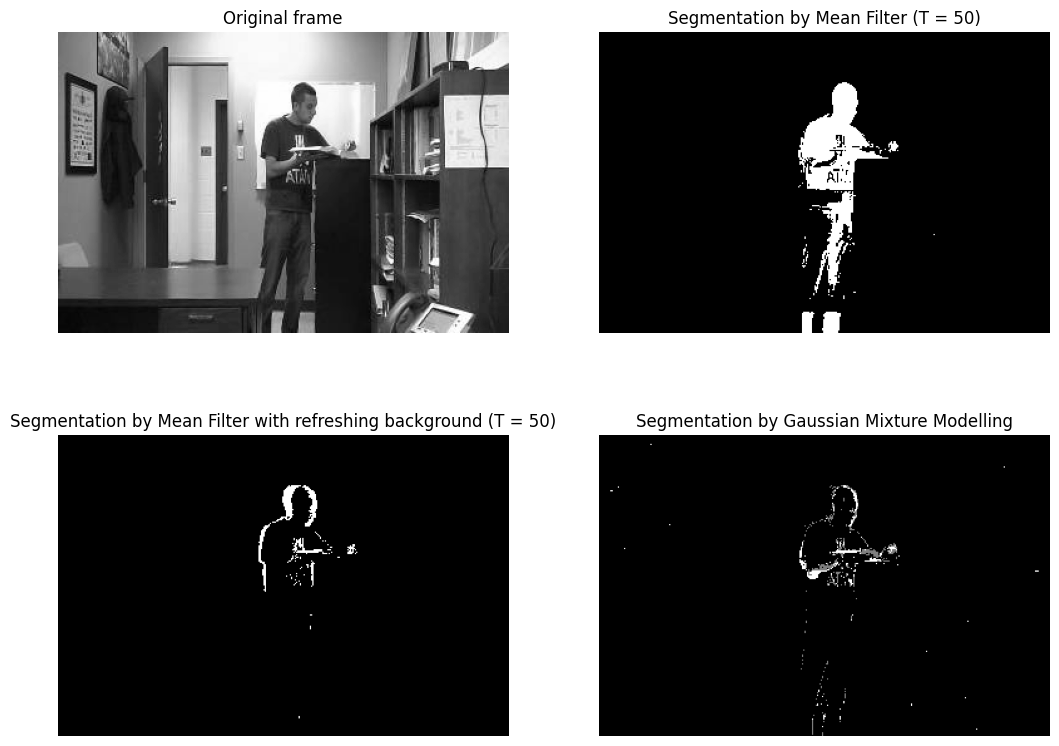

In [3]:
plt.figure(figsize=[6.4 * 2, 4.8 * 2])
plt.subplot(2, 2, 1)
plt.imshow(gray_frame, cmap='gray')
plt.axis("off")
plt.title("Original frame")

name_of_segmentation_method = [f"Mean Filter (T = {T})", f"Mean Filter with refreshing background (T = {T})", "Gaussian Mixture Modelling"]
for i in range(0, 3):
    plt.subplot(2, 2, 2 + i)
    plt.imshow(segmented_frames[i], cmap='gray')
    plt.axis("off")
    plt.title("Segmentation by " + name_of_segmentation_method[i])

## Задание 3

Скачать вторую [тестовую видео-последовательность](https://drive.google.com/file/d/1kpCAwbMxkKrFWP9mtAObn8svhGaifUJQ/view?usp=sharing). (Для считывания видео-последовательностей: cv.VideoCapture)

In [4]:
cap = cv2.VideoCapture('bg_sub2/in%06d.jpg')

## Задание 4

Повторить построение модели фона и выполнить сегментацию движения теми же методами.

In [5]:
# number of frames for getting background
frames_for_bg = 1000

# frame under study 
frame_index = 1001
cap.set(cv2.CAP_PROP_POS_FRAMES, frame_index - 1)
gray_frame = cv2.cvtColor(cap.read()[1], cv2.COLOR_RGB2GRAY)

#threshold value
T = 50

segmentation_by_mean_filter = mean_filter(gray_frame, T, cap, frame_index, frames_for_bg)
segmentation_mean_filter_with_refr_bg = mean_filter_with_refr_bg(gray_frame, T, cap, frame_index, frames_for_bg)
segmentation_by_GMM = GMM(cap, frame_index, frames_for_bg)
segmented_frames = [segmentation_by_mean_filter, segmentation_mean_filter_with_refr_bg, segmentation_by_GMM]

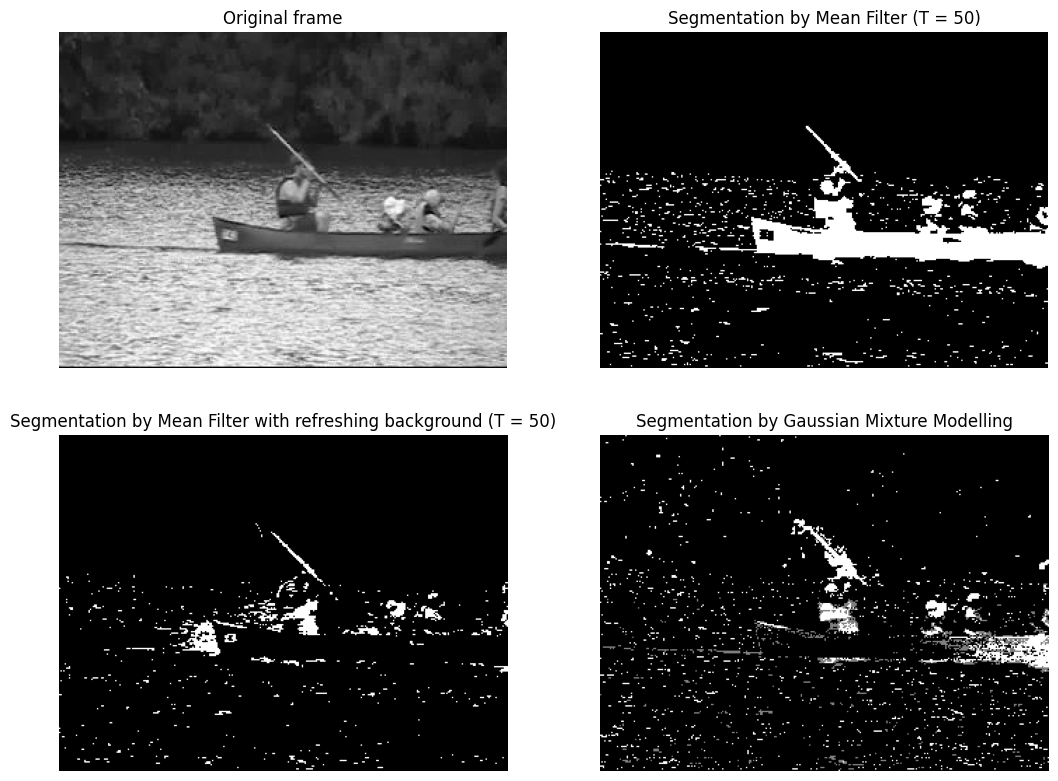

In [6]:
plt.figure(figsize=[6.4 * 2, 4.8 * 2])
plt.subplot(2, 2, 1)
plt.imshow(gray_frame, cmap='gray')
plt.axis("off")
plt.title("Original frame")

name_of_segmentation_method = [f"Mean Filter (T = {T})", f"Mean Filter with refreshing background (T = {T})", "Gaussian Mixture Modelling"]
for i in range(0, 3):
    plt.subplot(2, 2, 2 + i)
    plt.imshow(segmented_frames[i], cmap='gray')
    plt.axis("off")
    plt.title("Segmentation by " + name_of_segmentation_method[i])

Еще накину медианный фильтр, чтоб (может быть) чуть получше выглядело:

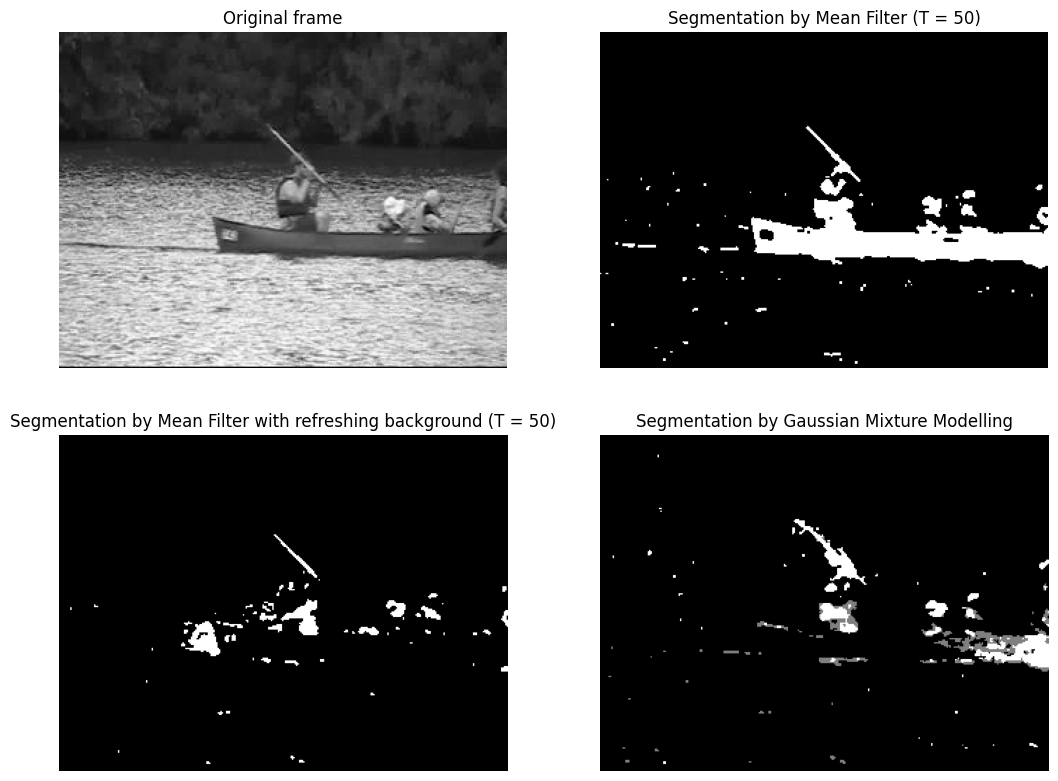

In [7]:
kernel_size = 3
blured_frames = [cv2.medianBlur(mask, kernel_size) for mask in segmented_frames]

plt.figure(figsize=[6.4 * 2, 4.8 * 2])
plt.subplot(2, 2, 1)
plt.imshow(gray_frame, cmap='gray')
plt.axis("off")
plt.title("Original frame")

name_of_segmentation_method = [f"Mean Filter (T = {T})", f"Mean Filter with refreshing background (T = {T})", "Gaussian Mixture Modelling"]
for i in range(0, 3):
    plt.subplot(2, 2, 2 + i)
    plt.imshow(blured_frames[i], cmap='gray')
    plt.axis("off")
    plt.title("Segmentation by " + name_of_segmentation_method[i])

### Выполнил: Лежнин Максим Витальевич